In [2]:
#This mini project is about the classification and identification of Hand written digits(MNIST datasets)
#Objective: To make a program which identifies the user handwritten digit and give us output

In [3]:
#Imporing Libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [4]:
#Data Creation
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


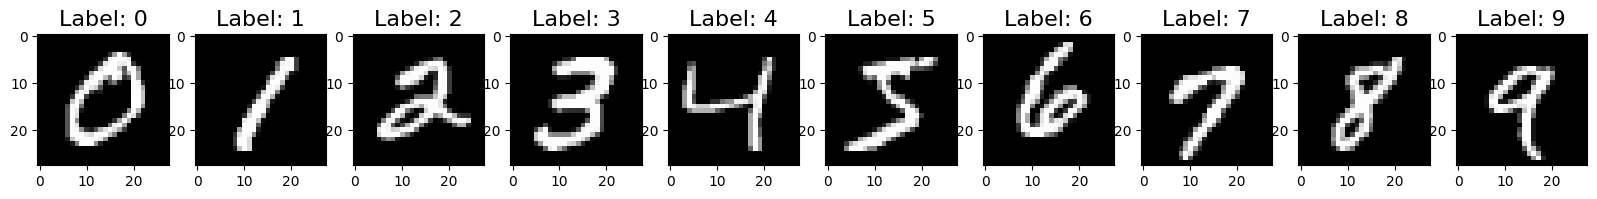

In [5]:
#Visualize Examples
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 16)


In [6]:
#Encoding labels
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
#Creating Vectors and Categorization
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])



[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
#Data prepare
#Normalizing Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
#Reshape The Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)


(60000, 784)


In [11]:
#Creating Model for the network
model = Sequential()
model.add(Dense(units = 128, input_shape=(784,), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Training the model
batch_size = 512
epochs = 10
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)


Epoch 1/10
118/118 [==============================] - 2s 13ms/step - loss: 0.6013 - accuracy: 0.8265
Epoch 2/10
118/118 [==============================] - 2s 19ms/step - loss: 0.2246 - accuracy: 0.9337
Epoch 3/10
118/118 [==============================] - 2s 16ms/step - loss: 0.1634 - accuracy: 0.9512
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1302 - accuracy: 0.9613
Epoch 5/10
118/118 [==============================] - 1s 13ms/step - loss: 0.1084 - accuracy: 0.9679
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0920 - accuracy: 0.9729
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0800 - accuracy: 0.9759
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 9/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0623 - accuracy: 0.9813
Epoch 10/10
118/118 [==============================] - 2s 18ms/step - loss: 0.0541 - accura

In [13]:
#Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9758
Test Loss: 0.07508857548236847, Test Accuracy: 0.9757999777793884


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[6.6072198e-07 8.7010394e-06 1.0105534e-04 ... 9.9642640e-01
  7.4848838e-05 5.5297183e-05]
 [1.1659094e-08 1.6085242e-04 9.9983430e-01 ... 2.2732159e-08
  4.1743451e-07 1.9944980e-10]
 [2.2288130e-05 9.9436069e-01 2.5010694e-04 ... 3.6144622e-03
  7.0299360e-04 2.5689815e-05]
 ...
 [1.8586840e-10 1.8030049e-09 1.4753807e-09 ... 5.6750821e-07
  2.1850333e-06 2.6744758e-05]
 [1.3018137e-08 7.2347646e-08 6.2866823e-11 ... 7.9405282e-09
  7.7569157e-06 8.8567667e-08]
 [3.7845282e-08 8.0670831e-11 2.4165605e-08 ... 2.1334124e-12
  7.6046689e-09 1.6579413e-09]]
[7 2 1 ... 4 5 6]


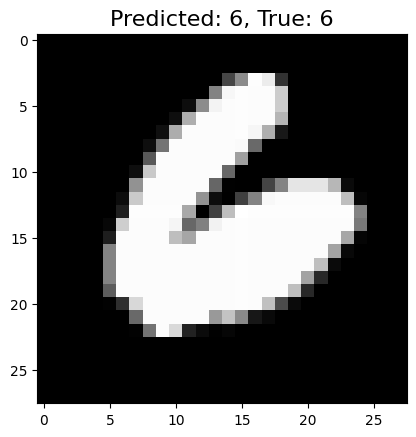

In [24]:
#Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]
#Plotting
plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')

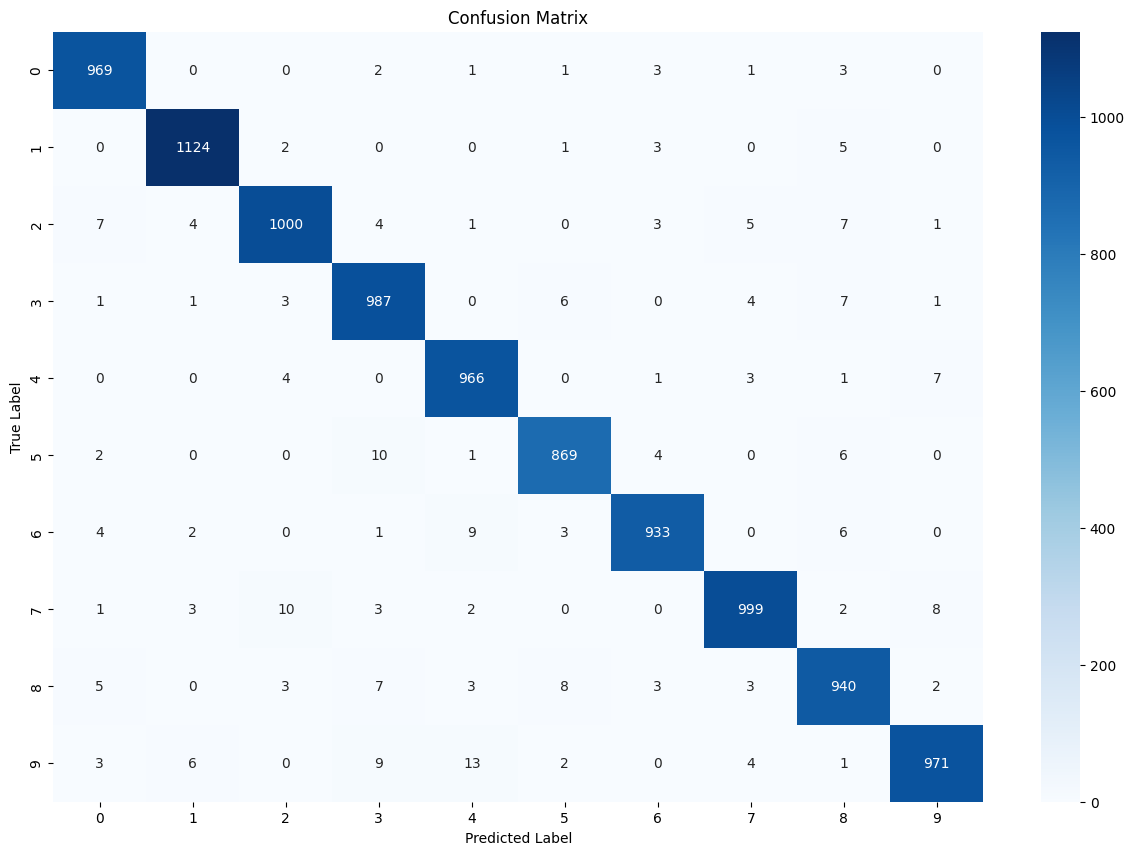

In [17]:
#Confusion Matrix: It will show how our network is accurate for every class
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
#Plotting
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [18]:
#Deep diving into errors
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]





In [19]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

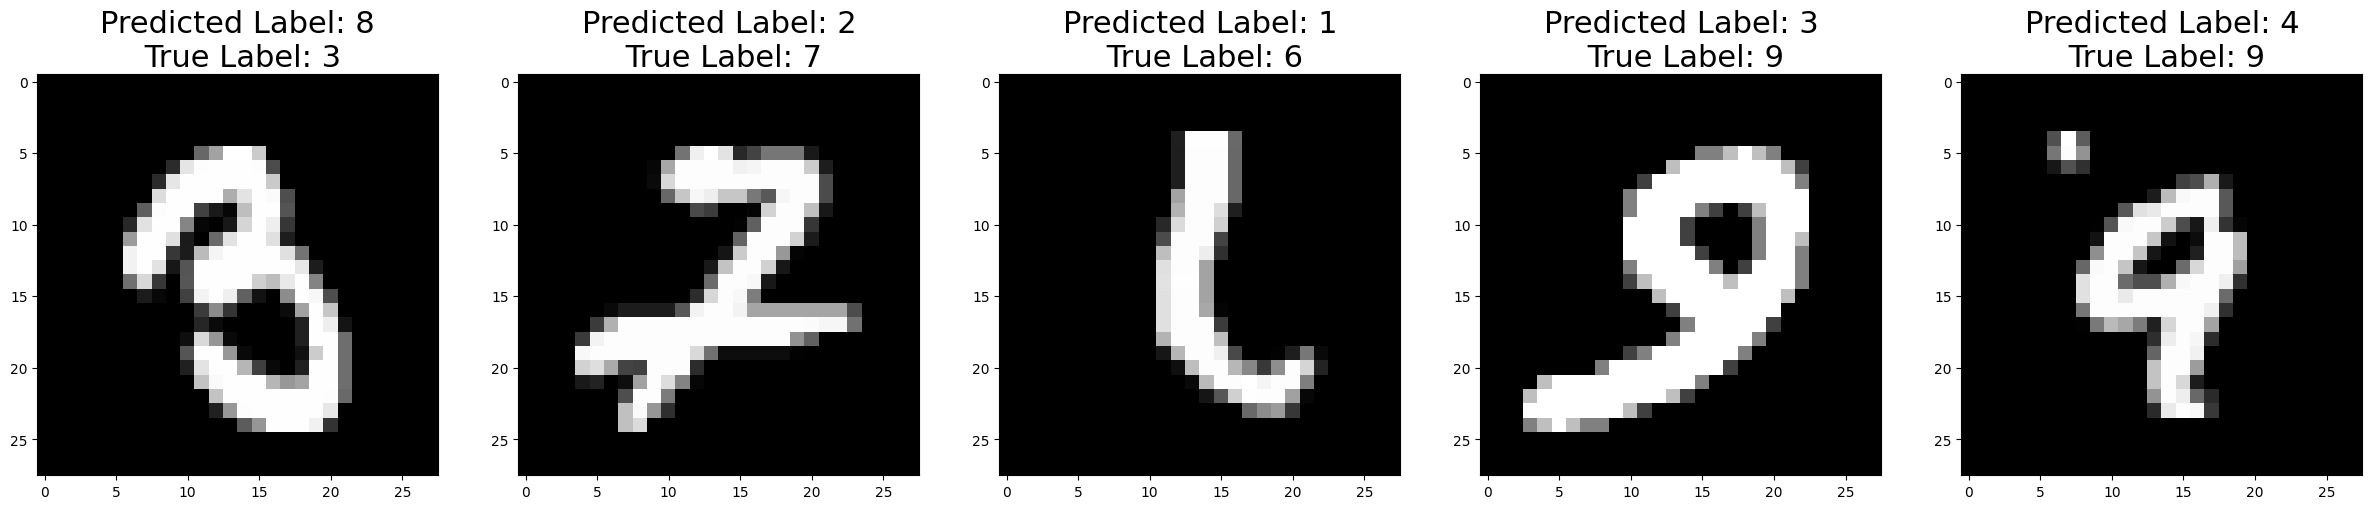

In [26]:
#Show top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize = (30, 30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28, 28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted Label: {}\n True Label: {}".format(y_p, y_t), fontsize = 22 )
